Assignment


Link: https://www.kaggle.com/c/rossmann-store-sales

Perform the following tasks:
1.	Extract the features which you find suitable.
2.	Create any 3 graphs of your choice which can be worth interpretable
3.	Build a regression model using Sales as response variable with
a.	K-NN Regression (best k)
b.	Linear Regression
c.	Ridge Regression
d.	Lasso Regression
e.	Decision Tree Regression

Which score is better on the leader board among all the above algorithms tried?


### CSV Files:

/content/store.csv

/content/train.csv

/content/test.csv

/content/sample_submission.csv

Target Variable: Sales

### Import required modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [2]:
#Suppress Warning for clean notebook
import warnings
warnings.filterwarnings("ignore")

In [6]:
train = pd.read_csv(r'C:\Users\Abhinav\C-DAC\Machine Learning\Data files Extra\rossmann-store-sales\train.csv',parse_dates=["Date"])
train.shape


(1017209, 9)

In [7]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [8]:
test = pd.read_csv(r'C:\Users\Abhinav\C-DAC\Machine Learning\Data files Extra\rossmann-store-sales\test.csv',parse_dates=["Date"])

In [9]:
train.isnull().sum() #Checking total NaN values in each column

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [10]:
test.isnull().sum() #Checking total NaN values in each column

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

we can see there are NaN values in "Open" column

In [11]:
test['Open'].value_counts()

1.0    35093
0.0     5984
Name: Open, dtype: int64

In [12]:
#Filling NaN values in Open column

test['Open'].fillna(method='ffill',inplace=True)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             41088 non-null  int64         
 1   Store          41088 non-null  int64         
 2   DayOfWeek      41088 non-null  int64         
 3   Date           41088 non-null  datetime64[ns]
 4   Open           41088 non-null  float64       
 5   Promo          41088 non-null  int64         
 6   StateHoliday   41088 non-null  object        
 7   SchoolHoliday  41088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 2.5+ MB


In [15]:
test['year']=test['Date'].dt.year
test['month']=test['Date'].dt.month
test['day']=test['Date'].dt.day
train['year']=train['Date'].dt.year
train['month']=train['Date'].dt.month
train['day']=train['Date'].dt.day

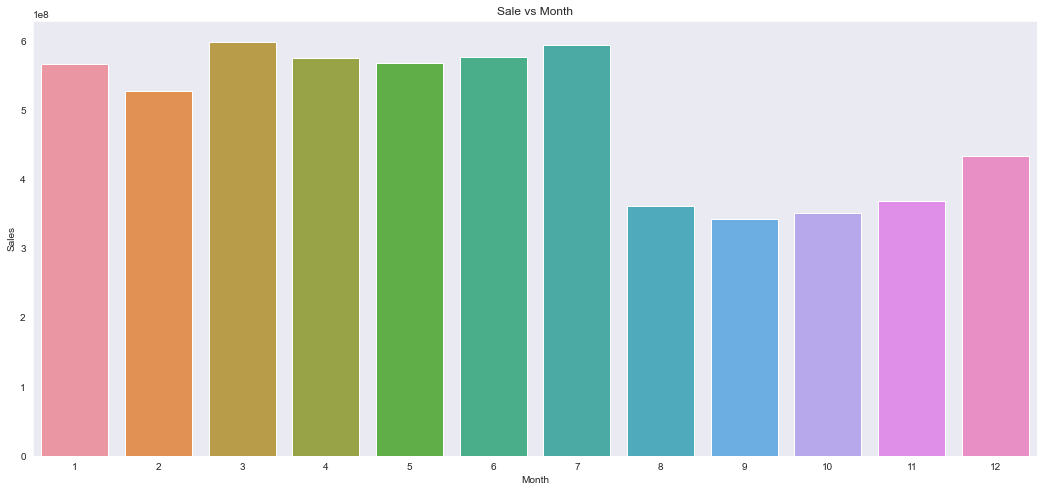

In [16]:
import matplotlib.pyplot as plt

import seaborn as sns
plt.figure(figsize=(18,8))
temp_train = train.groupby(train.month).sum()
sns.set_style("dark")
sns.barplot(temp_train.index,temp_train.Sales)

plt.title("Sale vs Month")
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()


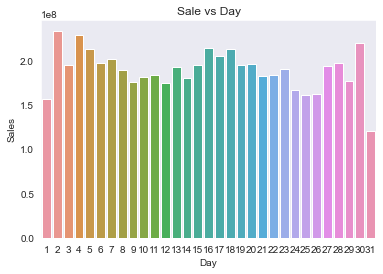

In [17]:
temp_train = train.groupby(train.day).sum()
sns.set_style("dark")

sns.barplot(temp_train.index,temp_train.Sales)
plt.title("Sale vs Day")
plt.xlabel('Day')
plt.ylabel('Sales')
plt.show()

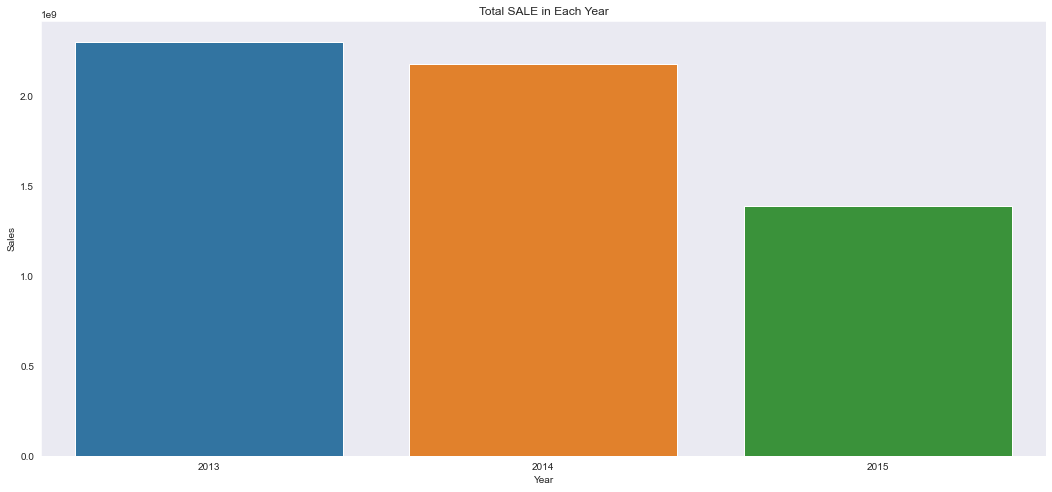

In [18]:
import seaborn as sns
plt.figure(figsize=(18,8))
temp_train = train.groupby(train.year).sum()
sns.barplot(temp_train.index,temp_train.Sales)
plt.title("Total SALE in Each Year")
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

Maximum total sales in the 2013

In [19]:
X = train.drop(columns=['Date','Sales','Customers'])
Y = train['Sales']

In [20]:
# to replace String 0 with int 0 , repetative values

X['StateHoliday'].replace(to_replace=0, value='0', inplace=True, limit=None, regex=False, method='pad')


In [21]:
X['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [22]:
X = pd.get_dummies(X,drop_first=True)

In [23]:
X

,Store,DayOfWeek,Open,Promo,SchoolHoliday,year,month,day,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,1,1,1,2015,7,31,0,0,0
1,2,5,1,1,1,2015,7,31,0,0,0
2,3,5,1,1,1,2015,7,31,0,0,0
3,4,5,1,1,1,2015,7,31,0,0,0
4,5,5,1,1,1,2015,7,31,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,0,0,1,2013,1,1,1,0,0
1017205,1112,2,0,0,1,2013,1,1,1,0,0
1017206,1113,2,0,0,1,2013,1,1,1,0,0
1017207,1114,2,0,0,1,2013,1,1,1,0,0


In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype
---  ------          --------------    -----
 0   Store           1017209 non-null  int64
 1   DayOfWeek       1017209 non-null  int64
 2   Open            1017209 non-null  int64
 3   Promo           1017209 non-null  int64
 4   SchoolHoliday   1017209 non-null  int64
 5   year            1017209 non-null  int64
 6   month           1017209 non-null  int64
 7   day             1017209 non-null  int64
 8   StateHoliday_a  1017209 non-null  uint8
 9   StateHoliday_b  1017209 non-null  uint8
 10  StateHoliday_c  1017209 non-null  uint8
dtypes: int64(8), uint8(3)
memory usage: 65.0 MB


In [25]:
# to replace String 0 with int 0 , repetative values
test['StateHoliday'].replace(to_replace=0, value='0', inplace=True, limit=None, regex=False, method='pad') 

In [26]:
test['StateHoliday'].unique()

array(['0', 'a'], dtype=object)

In [27]:
test = pd.get_dummies(test,drop_first=True)

In [28]:
test = test.drop(columns=['Date','Id'])


In [29]:
test[["StateHoliday_b","StateHoliday_c"]]=0 #to balance columns in test

In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store           41088 non-null  int64  
 1   DayOfWeek       41088 non-null  int64  
 2   Open            41088 non-null  float64
 3   Promo           41088 non-null  int64  
 4   SchoolHoliday   41088 non-null  int64  
 5   year            41088 non-null  int64  
 6   month           41088 non-null  int64  
 7   day             41088 non-null  int64  
 8   StateHoliday_a  41088 non-null  uint8  
 9   StateHoliday_b  41088 non-null  int64  
 10  StateHoliday_c  41088 non-null  int64  
dtypes: float64(1), int64(9), uint8(1)
memory usage: 3.2 MB


#Feature Selection
 by using Ginni Index

In [31]:
# Gini index for feature selection

model_dt = DecisionTreeRegressor()
model_dt.fit(X,Y)
model_dt.feature_importances_

array([3.73794842e-01, 3.46497230e-02, 4.60324724e-01, 7.31426930e-02,
       3.75360891e-03, 5.68669614e-03, 2.40810463e-02, 2.39165471e-02,
       4.46969768e-04, 1.94900146e-04, 8.24939004e-06])

In [32]:
m = max(model_dt.feature_importances_)
for imp, col in zip(model_dt.feature_importances_,X.columns):
    print(col, "-----",imp/m*100)
m = max(model_dt.feature_importances_)
lst = []
for imp, col in zip(model_dt.feature_importances_,X.columns):
    if (imp/m*100) > 10:
      lst.append(col)
#X_train.columns
lst

Store ----- 81.20242562407967
DayOfWeek ----- 7.527234828275027
Open ----- 100.0
Promo ----- 15.889368777028876
SchoolHoliday ----- 0.8154263094537074
year ----- 1.2353662194106314
month ----- 5.231317166880341
day ----- 5.195581700206872
StateHoliday_a ----- 0.09709879663143875
StateHoliday_b ----- 0.04233970844460038
StateHoliday_c ----- 0.0017920805920419555


['Store', 'Open', 'Promo']

By using Ginni index for selecting important features ,  we came to a conclusion that out of all the columns ['Store', 'Open', 'Promo'] are strongly influential. 
The data is mix of numerical and categorical.So concluding which feature is to be taken on the basis of gini index coeff. in not valid
So selecting all the columns for bulding my model.

#KNN

In [33]:
parameters = {'n_neighbors': np.arange(1,16)}
print(parameters)

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])}


In [34]:
knn = KNeighborsRegressor()

In [35]:
kfold = KFold(n_splits=5 , random_state=2021,shuffle=True)
cv = GridSearchCV(knn, param_grid=parameters,cv=kfold,scoring='r2',verbose=3)
cv.fit( X , Y )

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.292 total time=  12.9s
[CV 2/5] END .....................n_neighbors=1;, score=0.295 total time=  13.3s
[CV 3/5] END .....................n_neighbors=1;, score=0.293 total time=  13.4s
[CV 4/5] END .....................n_neighbors=1;, score=0.289 total time=  13.7s
[CV 5/5] END .....................n_neighbors=1;, score=0.291 total time=  13.6s
[CV 1/5] END .....................n_neighbors=2;, score=0.566 total time=  14.2s
[CV 2/5] END .....................n_neighbors=2;, score=0.566 total time=  13.0s
[CV 3/5] END .....................n_neighbors=2;, score=0.562 total time=  14.0s
[CV 4/5] END .....................n_neighbors=2;, score=0.563 total time=  13.5s
[CV 5/5] END .....................n_neighbors=2;, score=0.563 total time=  13.3s
[CV 1/5] END .....................n_neighbors=3;, score=0.698 total time=  13.5s
[CV 2/5] END .....................n_neighbors=3;

GridSearchCV(cv=KFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])},
             scoring='r2', verbose=3)

In [36]:
#pd.DataFrame(cv.cv_results_  )
print(cv.best_params_)
print(cv.best_score_)

print(cv.best_estimator_)

{'n_neighbors': 4}
0.7171699840967332
KNeighborsRegressor(n_neighbors=4)


In [37]:
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit( X , Y )
y_pred = knn.predict(test)

# from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
# print( np.sqrt( mean_squared_error(y_test, y_pred)))
# print(mean_absolute_error(y_test, y_pred))
# print(r2_score(y_test, y_pred))

In [38]:
y_pred

array([ 4896.5 ,  7665.  ,  7148.75, ..., 10120.  , 13703.25, 14344.25])

In [40]:
samp=pd.read_csv(r"C:\Users\Abhinav\C-DAC\Machine Learning\Data files Extra\rossmann-store-sales\sample_submission.csv",index_col=0)
samp

,Sales
Id,
1,0
2,0
3,0
4,0
5,0
...,...
41084,0
41085,0
41086,0


In [41]:
samp["Sales"]=y_pred
samp

,Sales
Id,
1,4896.50
2,7665.00
3,7148.75
4,6839.00
5,6134.50
...,...
41084,4522.00
41085,6551.50
41086,10120.00


In [42]:
submit=pd.DataFrame(samp,columns=samp.columns)
submit.to_csv("KNN_Rossman.csv")

#linear Regression

In [43]:
regressor = LinearRegression()
kfold = KFold(n_splits=5, random_state=2021,shuffle=True)
results = cross_val_score(regressor, X, Y, cv=kfold, 
                          scoring='r2')
R2 = results
print(R2)
print("R-max: %.2f" % (R2.max()))

[0.54063436 0.53786229 0.53778685 0.53595757 0.53780896]
R-max: 0.54


In [44]:
regressor = LinearRegression()
regressor.fit(X, Y)
print(regressor.coef_)
print(regressor.intercept_)

y_pred_linear = regressor.predict(test)


[ 6.05072877e-02 -1.40729827e+02  5.56293698e+03  2.07660777e+03
  8.74830840e+01  1.71936170e+02  6.85313754e+01 -2.58591484e+00
 -1.13517860e+03 -1.44722699e+03 -7.35943676e+02]
-345698.59771708306


In [45]:
samp["Sales"]=y_pred_linear
samp

,Sales
Id,
1,8402.292419
2,8402.413434
3,8402.655463
4,8402.715970
5,8402.776477
...,...
41084,6084.231343
41085,6084.291850
41086,6084.352357


In [46]:
submit=pd.DataFrame(samp,columns=samp.columns)
submit.to_csv("Linear_Rossman.csv")

#Lasso

In [47]:
from sklearn.linear_model import Lasso
parameters = dict(alpha=np.linspace(0.001,40))
from sklearn.model_selection import GridSearchCV
clf = Lasso()
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, random_state=2021,shuffle=True)
cv = GridSearchCV(clf, param_grid=parameters,
                  cv=kfold,scoring='r2')

cv.fit(X,Y)

# Best Parameters
print(cv.best_params_)

print(cv.best_score_)

print(cv.best_estimator_)

best_model = cv.best_estimator_
print(best_model.coef_)
print(best_model.intercept_)
#print(best_model.sparse_coef_)

{'alpha': 0.001}
0.5380100053411366
Lasso(alpha=0.001)
[ 6.05072776e-02 -1.40728289e+02  5.56295981e+03  2.07660323e+03
  8.74629923e+01  1.71934079e+02  6.85310579e+01 -2.58592386e+00
 -1.13510406e+03 -1.44703578e+03 -7.35657029e+02]
-345694.4094828365


In [48]:
clf = Lasso(alpha=0.001)
clf.fit(X,Y) 

y_pred_Lasso = clf.predict(test)


In [49]:
samp["Sales"]=y_pred_Lasso
samp

,Sales
Id,
1,8402.289733
2,8402.410747
3,8402.652776
4,8402.713284
5,8402.773791
...,...
41084,6084.236730
41085,6084.297237
41086,6084.357744


In [50]:
submit=pd.DataFrame(samp,columns=samp.columns)
submit.to_csv("Lasso_Rossman.csv")

In [51]:
parameters = dict(alpha=np.linspace(0.01,40))

clf = Ridge()
kfold = KFold(n_splits=5, random_state=2021,shuffle=True)
cv = GridSearchCV(clf, param_grid=parameters,
                  cv=kfold,scoring='r2')

cv.fit(X,Y)

df_cv = pd.DataFrame(cv.cv_results_)

# Best Parameters
print(cv.best_params_)

print(cv.best_score_)

cv.best_estimator_

{'alpha': 4.090612244897959}
0.5380100063208194


Ridge(alpha=4.090612244897959)

In [52]:
clf = Ridge(alpha=4.090612244897959)
clf.fit(X,Y) 
y_pred_Ridge = clf.predict(test)


In [53]:
samp["Sales"]=y_pred_Ridge
samp

,Sales
Id,
1,8402.251221
2,8402.372235
3,8402.614265
4,8402.674772
5,8402.735279
...,...
41084,6084.183896
41085,6084.244403
41086,6084.304910


In [54]:
submit=pd.DataFrame(samp,columns=samp.columns)
submit.to_csv("Ridge_Rossman.csv")

#Decision Tree 

In [55]:
depth_range = [3,4,5,6,7,8,9]
minsplit_range = [5,10,20,25,30]
minleaf_range = [5,10,15]

parameters = dict(max_depth=depth_range,
                  min_samples_split=minsplit_range, 
                  min_samples_leaf=minleaf_range)

kfold = KFold(n_splits=5, random_state=2021,shuffle=True)
clf = DecisionTreeRegressor(random_state=2021)
cv = GridSearchCV(clf, param_grid=parameters,
                  cv=kfold,scoring='r2')

cv.fit(X,Y)
# Best Parameters
print(cv.best_params_)

print(cv.best_score_)

cv.best_estimator_

{'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.5972243543578598


DecisionTreeRegressor(max_depth=9, min_samples_leaf=5, min_samples_split=5,
                      random_state=2021)

In [56]:
clf = DecisionTreeRegressor(max_depth=9,random_state=2020)
clf2 = clf.fit(X,Y)

y_pred_DTR = clf2.predict(test)

In [57]:
samp["Sales"]=y_pred_DTR
samp

,Sales
Id,
1,7303.918210
2,7303.918210
3,7303.918210
4,7303.918210
5,7303.918210
...,...
41084,5421.946043
41085,5421.946043
41086,5421.946043


In [58]:
submit=pd.DataFrame(samp,columns=samp.columns)
submit.to_csv("DTR_Rossman.csv")

# 3. Build a regression model using Sales as response variable

### Conclusion:
Which score is better on the leader board among all the above algorithms tried?

The best score is 0.717 for KNN regression model.